# Convolutional Neural Networks usando Keras e CIFAR-10

### 1. Carregando a base CIFAR-10 (imagens rotuladas em macro categorias)

*** Mais informações em https://www.cs.toronto.edu/~kriz/cifar.html ***

In [1]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator 
from keras import regularizers

Using TensorFlow backend.


In [0]:
#carregando o dataset pré-embaralhado de treinamento bem como os dados de teste
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_ori = x_train
x_test_ori = x_test
y_test_ori = y_test

### 2. Visualizando as primeiras 24 imagens do dataset de treinamento

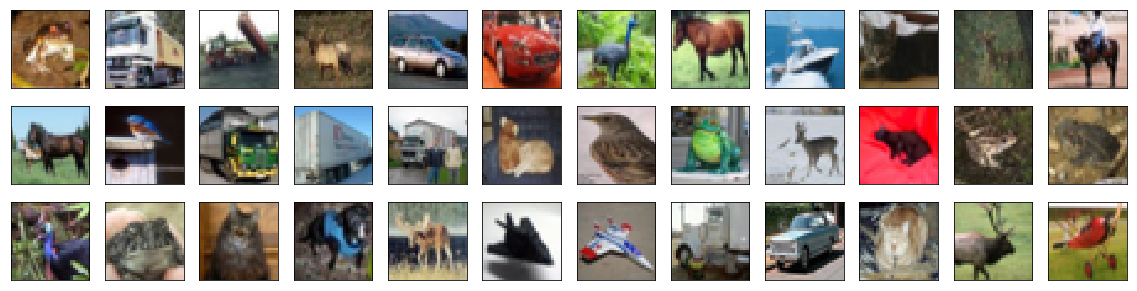

In [3]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [0]:
# redimensionamento [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

In [7]:
# "one-hot encode" aplicado aos rótulos
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# divindo dataset de treinamento em treinamento, teste e validação
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# impressão da forma do conjunto de treino
print('x_train shape:', x_train.shape)

# impressão do número de imagens nos datasets de treinamento, teste e validação
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

* 3 camadas convolucionais de tamanho progressivamente crescente
* Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
* Uma camada do tipo totalmente conectada de 100 neurônios
* Últimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
* "Dropout" de 0,2-0,3

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#Modelo original passado no exercício pelo professor
def cria_modelo_ori(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 
  
  
    
# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/


### Cria o modelo e roda o teste

In [8]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']

model = cria_modelo_ori(filtros,funcoes)
print(model.summary())

from keras.callbacks import ModelCheckpoint   

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 128)         0         
__________

O melhor resultado obtido foi de <b>73,04%</b> de acurácia

### Teste 1 - Aumentar a quantidade de épocas no treinamento

In [11]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_ori(filtros,funcoes)

# Época alterada de 15 para 30 
hist = model.fit(x_train, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 4s - loss: 1.7362 - acc: 0.3714 - val_loss: 1.3829 - val_acc: 0.5020

Epoch 00001: val_loss did not improve from 0.79649
Epoch 2/30
 - 4s - loss: 1.3798 - acc: 0.5062 - val_loss: 1.2365 - val_acc: 0.5698

Epoch 00002: val_loss did not improve from 0.79649
Epoch 3/30
 - 4s - loss: 1.2260 - acc: 0.5671 - val_loss: 1.6126 - val_acc: 0.4622

Epoch 00003: val_loss did not improve from 0.79649
Epoch 4/30
 - 4s - loss: 1.1175 - acc: 0.6064 - val_loss: 1.0527 - val_acc: 0.6192

Epoch 00004: val_loss did not improve from 0.79649
Epoch 5/30
 - 4s - loss: 1.0468 - acc: 0.6334 - val_loss: 1.0949 - val_acc: 0.6176

Epoch 00005: val_loss did not improve from 0.79649
Epoch 6/30
 - 4s - loss: 0.9944 - acc: 0.6522 - val_loss: 1.1941 - val_acc: 0.5868

Epoch 00006: val_loss did not improve from 0.79649
Epoch 7/30
 - 4s - loss: 0.9534 - acc: 0.6684 - val_loss: 0.8870 - val_acc: 0.6904

Epoch 00007: val_loss did not improve from 0.79649
Epoch 

Ainda que se dobre o quantidade de épocas o resultado permanece quase o mesmo, com uma acurácia de <b>73,28%</b>. Deste modo, a melhora da performance não parece ser apenas uma questão de treinamento.

### Teste 2 - Alterar as funções de ativação  para sigmóide

In [12]:
filtros = [32,64,128]
funcoes = ['sigmoid','sigmoid','sigmoid']
model = cria_modelo_ori(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 4s - loss: 2.3113 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1038

Epoch 00001: val_loss did not improve from 0.79464
Epoch 2/15
 - 4s - loss: 2.3038 - acc: 0.1005 - val_loss: 2.3034 - val_acc: 0.1038

Epoch 00002: val_loss did not improve from 0.79464
Epoch 3/15
 - 4s - loss: 2.3032 - acc: 0.0982 - val_loss: 2.3028 - val_acc: 0.0920

Epoch 00003: val_loss did not improve from 0.79464
Epoch 4/15
 - 4s - loss: 2.3029 - acc: 0.0995 - val_loss: 2.3025 - val_acc: 0.1040

Epoch 00004: val_loss did not improve from 0.79464
Epoch 5/15
 - 4s - loss: 2.3019 - acc: 0.0984 - val_loss: 2.2809 - val_acc: 0.1790

Epoch 00005: val_loss did not improve from 0.79464
Epoch 6/15
 - 4s - loss: 2.1355 - acc: 0.1987 - val_loss: 2.0129 - val_acc: 0.2582

Epoch 00006: val_loss did not improve from 0.79464
Epoch 7/15
 - 4s - loss: 2.0240 - acc: 0.2507 - val_loss: 1.9677 - val_acc: 0.2634

Epoch 00007: val_loss did not improve from 0.79464
Epoch 

Alterando a função de ativação nas camadas convolucionais para sigmóide, o resultado fica bem pior, caindo para uma acurácia de <b>44,82%</b>

### Teste 3 - Retirando camada totalmente conectada (Dense) no final da rede

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_sem_dense(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 
  
  
    
# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/


In [20]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_sem_dense(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 7s - loss: 1.7749 - acc: 0.3500 - val_loss: 1.5403 - val_acc: 0.4434

Epoch 00001: val_loss did not improve from 0.74752
Epoch 2/15
 - 6s - loss: 1.3718 - acc: 0.5048 - val_loss: 1.2112 - val_acc: 0.5514

Epoch 00002: val_loss did not improve from 0.74752
Epoch 3/15
 - 6s - loss: 1.1786 - acc: 0.5795 - val_loss: 1.2336 - val_acc: 0.5630

Epoch 00003: val_loss did not improve from 0.74752
Epoch 4/15
 - 6s - loss: 1.0537 - acc: 0.6278 - val_loss: 0.9870 - val_acc: 0.6538

Epoch 00004: val_loss did not improve from 0.74752
Epoch 5/15
 - 6s - loss: 0.9603 - acc: 0.6658 - val_loss: 1.0147 - val_acc: 0.6624

Epoch 00005: val_loss did not improve from 0.74752
Epoch 6/15
 - 6s - loss: 0.8901 - acc: 0.6912 - val_loss: 0.8317 - val_acc: 0.7150

Epoch 00006: val_loss did not improve from 0.74752
Epoch 7/15
 - 6s - loss: 0.8415 - acc: 0.7087 - val_loss: 1.1220 - val_acc: 0.6352

Epoch 00007: val_loss did not improve from 0.74752
Epoch 

A estratégia de retirar a camada extra totalmente conectada (Dense) funcionou. A acurácia aumentou para <b>75,46%</b>

### Teste 4 - Utilizando camadas convolucionais duplas

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_camada_dupla(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))

    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 
  
  
    
# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/


In [24]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_camada_dupla(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 7s - loss: 1.6889 - acc: 0.3812 - val_loss: 1.6152 - val_acc: 0.3924

Epoch 00001: val_loss did not improve from 0.74752
Epoch 2/15
 - 6s - loss: 1.3027 - acc: 0.5291 - val_loss: 1.5162 - val_acc: 0.4754

Epoch 00002: val_loss did not improve from 0.74752
Epoch 3/15
 - 6s - loss: 1.1138 - acc: 0.6064 - val_loss: 1.1669 - val_acc: 0.5822

Epoch 00003: val_loss did not improve from 0.74752
Epoch 4/15
 - 6s - loss: 0.9739 - acc: 0.6553 - val_loss: 0.9838 - val_acc: 0.6462

Epoch 00004: val_loss did not improve from 0.74752
Epoch 5/15
 - 6s - loss: 0.8697 - acc: 0.6924 - val_loss: 1.1357 - val_acc: 0.6052

Epoch 00005: val_loss did not improve from 0.74752
Epoch 6/15
 - 6s - loss: 0.7948 - acc: 0.7206 - val_loss: 0.8472 - val_acc: 0.7060

Epoch 00006: val_loss did not improve from 0.74752
Epoch 7/15
 - 6s - loss: 0.7319 - acc: 0.7447 - val_loss: 0.8052 - val_acc: 0.7136

Epoch 00007: val_loss did not improve from 0.74752
Epoch 

O resultado foi um pouco melhor, atingiu <b>75,98%</b>

### Teste 5 - Utilizando strides de 3x3 na rede 

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_strides(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))

    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 


In [30]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_strides(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 7s - loss: 1.6798 - acc: 0.3825 - val_loss: 1.7498 - val_acc: 0.4480

Epoch 00001: val_loss did not improve from 0.71070
Epoch 2/15
 - 6s - loss: 1.1503 - acc: 0.5928 - val_loss: 1.3152 - val_acc: 0.5582

Epoch 00002: val_loss did not improve from 0.71070
Epoch 3/15
 - 6s - loss: 0.9176 - acc: 0.6804 - val_loss: 0.8880 - val_acc: 0.6914

Epoch 00003: val_loss did not improve from 0.71070
Epoch 4/15
 - 6s - loss: 0.7753 - acc: 0.7316 - val_loss: 1.1205 - val_acc: 0.6330

Epoch 00004: val_loss did not improve from 0.71070
Epoch 5/15
 - 6s - loss: 0.6675 - acc: 0.7685 - val_loss: 1.0317 - val_acc: 0.6456

Epoch 00005: val_loss did not improve from 0.71070
Epoch 6/15
 - 6s - loss: 0.5909 - acc: 0.7940 - val_loss: 0.7168 - val_acc: 0.7494

Epoch 00006: val_loss did not improve from 0.71070
Epoch 7/15
 - 6s - loss: 0.5209 - acc: 0.8200 - val_loss: 0.8446 - val_acc: 0.7164

Epoch 00007: val_loss did not improve from 0.71070
Epoch 

A estratégia também surtiu efeito. A nova acurácia agora é de <b>78,60%</b>

### Teste 6 - Incluindo Dropout nas camadas de "pooling"

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_mais_dropout(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))

    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 


In [32]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_mais_dropout(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 8s - loss: 1.7671 - acc: 0.3511 - val_loss: 1.8028 - val_acc: 0.3852

Epoch 00001: val_loss did not improve from 0.69155
Epoch 2/15
 - 6s - loss: 1.2806 - acc: 0.5404 - val_loss: 1.1047 - val_acc: 0.6102

Epoch 00002: val_loss did not improve from 0.69155
Epoch 3/15
 - 6s - loss: 1.0575 - acc: 0.6254 - val_loss: 1.0542 - val_acc: 0.6254

Epoch 00003: val_loss did not improve from 0.69155
Epoch 4/15
 - 6s - loss: 0.9154 - acc: 0.6794 - val_loss: 0.9695 - val_acc: 0.6588

Epoch 00004: val_loss did not improve from 0.69155
Epoch 5/15
 - 6s - loss: 0.8273 - acc: 0.7128 - val_loss: 0.7804 - val_acc: 0.7298

Epoch 00005: val_loss did not improve from 0.69155
Epoch 6/15
 - 6s - loss: 0.7560 - acc: 0.7379 - val_loss: 0.7665 - val_acc: 0.7358

Epoch 00006: val_loss did not improve from 0.69155
Epoch 7/15
 - 6s - loss: 0.7091 - acc: 0.7542 - val_loss: 0.7099 - val_acc: 0.7452

Epoch 00007: val_loss did not improve from 0.69155
Epoch 

Resultado muito bom. A acurácia atingiu <b>80,78%</b>

### Teste 7 - Acrescentando regularizadores (L2) à rede

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_com_L2(filtros,funcoes):
 
    param_l2 = 1e-4
    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),
                     activation=funcao,input_shape=(32, 32, 3)))
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))

    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same',kernel_regularizer=regularizers.l2(param_l2), activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 


In [34]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_com_L2(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 8s - loss: 1.8227 - acc: 0.3410 - val_loss: 1.7198 - val_acc: 0.4266

Epoch 00001: val_loss did not improve from 0.57611
Epoch 2/15
 - 6s - loss: 1.3877 - acc: 0.5111 - val_loss: 1.5571 - val_acc: 0.4904

Epoch 00002: val_loss did not improve from 0.57611
Epoch 3/15
 - 6s - loss: 1.1763 - acc: 0.5976 - val_loss: 1.5036 - val_acc: 0.5280

Epoch 00003: val_loss did not improve from 0.57611
Epoch 4/15
 - 6s - loss: 1.0476 - acc: 0.6473 - val_loss: 0.9564 - val_acc: 0.6764

Epoch 00004: val_loss did not improve from 0.57611
Epoch 5/15
 - 6s - loss: 0.9624 - acc: 0.6821 - val_loss: 1.4112 - val_acc: 0.5498

Epoch 00005: val_loss did not improve from 0.57611
Epoch 6/15
 - 6s - loss: 0.8971 - acc: 0.7081 - val_loss: 0.9439 - val_acc: 0.7010

Epoch 00006: val_loss did not improve from 0.57611
Epoch 7/15

Epoch 00007: val_loss did not improve from 0.57611
Epoch 8/15
 - 6s - loss: 0.8072 - acc: 0.7440 - val_loss: 0.8242 - val_acc: 0.

Apesar de se ter obtido uma melhora no indicador (acurácia), há muitos saltos com a regularização entre uma época e outra. Será realizado um novo teste com uma quantidade maior de épocas. 

### Teste 8 - Novo teste com regularizador L2 e uma quantidade maior de épocas

In [35]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_com_L2(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 8s - loss: 1.7858 - acc: 0.3532 - val_loss: 2.2313 - val_acc: 0.3354

Epoch 00001: val_loss did not improve from 0.57611
Epoch 2/30
 - 6s - loss: 1.3322 - acc: 0.5331 - val_loss: 1.4917 - val_acc: 0.4856

Epoch 00002: val_loss did not improve from 0.57611
Epoch 3/30
 - 6s - loss: 1.1323 - acc: 0.6135 - val_loss: 1.0858 - val_acc: 0.6348

Epoch 00003: val_loss did not improve from 0.57611
Epoch 4/30
 - 6s - loss: 1.0146 - acc: 0.6613 - val_loss: 1.1260 - val_acc: 0.6382

Epoch 00004: val_loss did not improve from 0.57611
Epoch 5/30
 - 6s - loss: 0.9217 - acc: 0.6978 - val_loss: 1.0640 - val_acc: 0.6446

Epoch 00005: val_loss did not improve from 0.57611
Epoch 6/30
 - 6s - loss: 0.8648 - acc: 0.7196 - val_loss: 0.8034 - val_acc: 0.7474

Epoch 00006: val_loss did not improve from 0.57611
Epoch 7/30
 - 6s - loss: 0.8179 - acc: 0.7370 - val_loss: 1.1802 - val_acc: 0.6338

Epoch 00007: val_loss did not improve from 0.57611
Epoch 

Os resultados melhoraram, foi alcançada uma acurácia de <b>81,52%</b> na amostra de validação

### Teste 9 - Utilização de Normalização em Batch (BatchNormalization) para acelerar o aprendizado

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_com_batch(filtros,funcoes):
 
    param_l2 = 1e-4
    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),
                     activation=funcao,input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same',kernel_regularizer=regularizers.l2(param_l2), activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 


In [38]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_com_batch(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 11s - loss: 1.7937 - acc: 0.4767 - val_loss: 1.4406 - val_acc: 0.5228

Epoch 00001: val_loss did not improve from 0.57611
Epoch 2/30
 - 9s - loss: 1.2984 - acc: 0.6263 - val_loss: 1.4894 - val_acc: 0.5276

Epoch 00002: val_loss did not improve from 0.57611
Epoch 3/30
 - 9s - loss: 1.1400 - acc: 0.6786 - val_loss: 1.2296 - val_acc: 0.6240

Epoch 00003: val_loss did not improve from 0.57611
Epoch 4/30
 - 9s - loss: 1.0409 - acc: 0.7156 - val_loss: 1.3620 - val_acc: 0.6424

Epoch 00004: val_loss did not improve from 0.57611
Epoch 5/30
 - 9s - loss: 0.9556 - acc: 0.7438 - val_loss: 0.7596 - val_acc: 0.7690

Epoch 00005: val_loss did not improve from 0.57611
Epoch 6/30
 - 9s - loss: 0.9433 - acc: 0.7578 - val_loss: 0.7636 - val_acc: 0.7748

Epoch 00006: val_loss did not improve from 0.57611
Epoch 7/30
 - 9s - loss: 0.8950 - acc: 0.7732 - val_loss: 0.8001 - val_acc: 0.7722

Epoch 00007: val_loss did not improve from 0.57611
Epoch

Resultado muito bom. Acurácia subiu para <b>84,54%</b> na amostra de validação

### Teste 9 - Estandarização dos dados para acelerar o Learning Rate em conjunto com BatchNormalization

In [43]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_com_batch(filtros,funcoes)

#estandarização dos dados
media = np.mean(x_train,axis=(0,1,2,3))
desv_padrao = np.std(x_train,axis=(0,1,2,3))
x_train_norm = (x_train-media)/(desv_padrao+1e-7)
x_valid_norm = (x_valid-media)/(desv_padrao+1e-7)
x_test_norm = (x_test-media)/(desv_padrao+1e-7)

 
hist = model.fit(x_train_norm, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid_norm, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 12s - loss: 1.8054 - acc: 0.4692 - val_loss: 1.7420 - val_acc: 0.5298

Epoch 00001: val_loss did not improve from 0.57611
Epoch 2/30
 - 9s - loss: 1.2616 - acc: 0.6333 - val_loss: 1.1390 - val_acc: 0.6380

Epoch 00002: val_loss did not improve from 0.57611
Epoch 3/30
 - 9s - loss: 1.1503 - acc: 0.6830 - val_loss: 0.9155 - val_acc: 0.7126

Epoch 00003: val_loss did not improve from 0.57611
Epoch 4/30
 - 9s - loss: 1.0016 - acc: 0.7220 - val_loss: 1.2858 - val_acc: 0.6442

Epoch 00004: val_loss did not improve from 0.57611
Epoch 5/30

Epoch 00005: val_loss did not improve from 0.57611
Epoch 6/30
 - 9s - loss: 0.9758 - acc: 0.7538 - val_loss: 1.0501 - val_acc: 0.7364

Epoch 00006: val_loss did not improve from 0.57611
Epoch 7/30
 - 9s - loss: 0.9441 - acc: 0.7686 - val_loss: 1.0100 - val_acc: 0.7652

Epoch 00007: val_loss did not improve from 0.57611
Epoch 8/30
 - 9s - loss: 0.8955 - acc: 0.7820 - val_loss: 0.7448 - val_acc: 0

A transformação melhorou um pouco o indicador. Acurácia obtida = <b>84,68%</b>

### Teste 10 Utilizar a função de ativação ELU (Exponential Linear Unit)

In [49]:
filtros = [32,64,128]
funcoes = ['elu','elu','elu']

model = cria_modelo_com_batch(filtros,funcoes)

#estandarização dos dados
 
hist = model.fit(x_train_norm, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid_norm, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 14s - loss: 1.7687 - acc: 0.4750 - val_loss: 1.3248 - val_acc: 0.6002

Epoch 00001: val_loss did not improve from 0.57611
Epoch 2/30
 - 10s - loss: 1.1194 - acc: 0.6462 - val_loss: 1.2368 - val_acc: 0.6546

Epoch 00002: val_loss did not improve from 0.57611
Epoch 3/30
 - 10s - loss: 0.9373 - acc: 0.7039 - val_loss: 1.1723 - val_acc: 0.6406

Epoch 00003: val_loss did not improve from 0.57611
Epoch 4/30
 - 10s - loss: 0.8417 - acc: 0.7400 - val_loss: 0.9861 - val_acc: 0.7072

Epoch 00004: val_loss did not improve from 0.57611
Epoch 5/30
 - 10s - loss: 0.7665 - acc: 0.7656 - val_loss: 0.7288 - val_acc: 0.7814

Epoch 00005: val_loss did not improve from 0.57611
Epoch 6/30

Epoch 00006: val_loss did not improve from 0.57611
Epoch 7/30
 - 10s - loss: 0.6723 - acc: 0.8025 - val_loss: 0.6931 - val_acc: 0.7994

Epoch 00007: val_loss did not improve from 0.57611
Epoch 8/30
 - 10s - loss: 0.6400 - acc: 0.8184 - val_loss: 0.7467 - val_

O resultado foi bom. A acurácia agora está em <b>85,14%</b>

### Teste 11 Utilização de Data Augmentation para salientar características da imagem e facilitar detecção de característcas

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train_norm)

In [51]:


filtros = [32,64,128]
funcoes = ['elu','elu','elu']
model = cria_modelo_com_batch(filtros,funcoes)


hist = model.fit_generator(datagen.flow(x_train_norm, y_train, batch_size=64), epochs=30,
          steps_per_epoch=math.ceil(x_train_norm.shape[0]//64),
          validation_data=(x_valid_norm, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/30
 - 26s - loss: 1.9303 - acc: 0.4187 - val_loss: 1.4320 - val_acc: 0.5752

Epoch 00001: val_loss did not improve from 0.57611
Epoch 2/30
 - 20s - loss: 1.3281 - acc: 0.5867 - val_loss: 1.3696 - val_acc: 0.6304

Epoch 00002: val_loss did not improve from 0.57611
Epoch 3/30
 - 20s - loss: 1.1507 - acc: 0.6432 - val_loss: 1.0767 - val_acc: 0.6732

Epoch 00003: val_loss did not improve from 0.57611
Epoch 4/30
 - 22s - loss: 1.0370 - acc: 0.6787 - val_loss: 0.9546 - val_acc: 0.7188

Epoch 00004: val_loss did not improve from 0.57611
Epoch 5/30
 - 20s - loss: 0.9546 - acc: 0.7053 - val_loss: 0.7666 - val_acc: 0.7742

Epoch 00005: val_loss did not improve from 0.57611
Epoch 6/30
 - 20s - loss: 0.8999 - acc: 0.7251 - val_loss: 0.8000 - val_acc: 0.7698

Epoch 00006: val_loss did not improve from 0.57611
Epoch 7/30
 - 20s - loss: 0.8655 - acc: 0.7388 - val_loss: 0.7414 - val_acc: 0.7864

Epoch 00007: val_loss did not improve from 0.57611
Epoch 8/30
 - 21s - loss: 0.8352 - acc: 0.7494 -

A estratégia funcionou. Após as transformações nas imagens a acurácia atingiu o patamar de <b>85,38%</b> de acurácia na amostra de validação

### Teste 12 - Pametrizando o otimizador do modelo (rmsprop)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_com_opt(filtros,funcoes):
 
    param_l2 = 1e-4
    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),
                     activation=funcao,input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same',kernel_regularizer=regularizers.l2(param_l2), activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt_rms, 
                  metrics=['accuracy'])       
    return model 


In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train_norm)

In [54]:
filtros = [32,64,128]
funcoes = ['elu','elu','elu']
model = cria_modelo_com_opt(filtros,funcoes)


hist = model.fit_generator(datagen.flow(x_train_norm, y_train, batch_size=64), epochs=30,
          steps_per_epoch=math.ceil(x_train_norm.shape[0]//64),
          validation_data=(x_valid_norm, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/30
 - 26s - loss: 1.9197 - acc: 0.4249 - val_loss: 1.4211 - val_acc: 0.5508

Epoch 00001: val_loss did not improve from 0.56793
Epoch 2/30
 - 20s - loss: 1.3715 - acc: 0.5798 - val_loss: 1.2633 - val_acc: 0.6298

Epoch 00002: val_loss did not improve from 0.56793
Epoch 3/30
 - 20s - loss: 1.1955 - acc: 0.6396 - val_loss: 1.1411 - val_acc: 0.6638

Epoch 00003: val_loss did not improve from 0.56793
Epoch 4/30
 - 20s - loss: 1.0930 - acc: 0.6711 - val_loss: 1.0098 - val_acc: 0.6950

Epoch 00004: val_loss did not improve from 0.56793
Epoch 5/30
 - 22s - loss: 1.0244 - acc: 0.6937 - val_loss: 0.7968 - val_acc: 0.7560

Epoch 00005: val_loss did not improve from 0.56793
Epoch 6/30
 - 20s - loss: 0.9474 - acc: 0.7140 - val_loss: 0.8610 - val_acc: 0.7450

Epoch 00006: val_loss did not improve from 0.56793
Epoch 7/30
 - 20s - loss: 0.9103 - acc: 0.7266 - val_loss: 0.7818 - val_acc: 0.7732

Epoch 00007: val_loss did not improve from 0.56793
Epoch 8/30
 - 20s - loss: 0.8684 - acc: 0.7397 -

Muito bom resultado. Melhorou ainda mais a acurácia atingindo <b>86,28%</b> na amostra de validação

### 6. Treinando o modelo - com mais épocas, com acerto de batch_size e learning_rate

In [0]:
#Controle de learning rate em função da quantidade de épocas
#ao final do treino deve-se diminuir o learning rate
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

In [0]:
#Conversor de imagens para salientar as características
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
#Treina com as imagens existentes
datagen.fit(x_train_norm)

In [0]:
#Cria o modelo
filtros = [32,64,128]
funcoes = ['elu','elu','elu']
model = cria_modelo_com_opt(filtros,funcoes)

In [0]:
#Cria um novo checkpointer para salvar os melhores modelos em novo arquivo hdf5
checkpointer = ModelCheckpoint(filepath='model.weights.best_final.hdf5', verbose=1, 
                               save_best_only=True)


In [58]:
bs = 128
epochs = 150

start = time.time()

hist = model.fit_generator(datagen.flow(x_train_norm, y_train, batch_size=bs), epochs=epochs, 
                           steps_per_epoch=math.ceil(x_train_norm.shape[0]//bs), validation_data=(x_valid_norm, y_valid),
                           callbacks=[checkpointer, LearningRateScheduler(lr_schedule)], verbose=2, shuffle=True)


end = time.time()
print("Tempo de treinamento: " + str(end - start) + "s")


Epoch 1/150
 - 25s - loss: 2.0543 - acc: 0.3865 - val_loss: 1.4831 - val_acc: 0.5354

Epoch 00001: val_loss improved from inf to 1.48315, saving model to model.weights.best_final.hdf5
Epoch 2/150
 - 18s - loss: 1.3938 - acc: 0.5500 - val_loss: 1.3752 - val_acc: 0.6142

Epoch 00002: val_loss improved from 1.48315 to 1.37520, saving model to model.weights.best_final.hdf5
Epoch 3/150
 - 18s - loss: 1.1751 - acc: 0.6219 - val_loss: 1.0498 - val_acc: 0.6684

Epoch 00003: val_loss improved from 1.37520 to 1.04977, saving model to model.weights.best_final.hdf5
Epoch 4/150
 - 20s - loss: 1.0547 - acc: 0.6604 - val_loss: 1.0138 - val_acc: 0.6884

Epoch 00004: val_loss improved from 1.04977 to 1.01383, saving model to model.weights.best_final.hdf5
Epoch 5/150
 - 18s - loss: 0.9796 - acc: 0.6893 - val_loss: 0.9206 - val_acc: 0.7200

Epoch 00005: val_loss improved from 1.01383 to 0.92061, saving model to model.weights.best_final.hdf5
Epoch 6/150
 - 18s - loss: 0.9101 - acc: 0.7096 - val_loss: 0.92

In [59]:
print('### Arquitetura final do modelo utilizada ')
print(model.summary())

### Arquitetura final do modelo utilizada 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_55 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_56 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (Non

O resultado do treinamento foi excelente. Alcançando após 150 épocas a acurácia de <b>90,74%</b> na amostra de validação

### 7. Carregando o modelo com a melhor precisão de validação

In [0]:
# carregando os pesos que geraram a melhor precisão de validação
model.load_weights('model.weights.best_final.hdf5')

### 8. Cálculo da precisão de classificação no dataset de testes

In [61]:
# avaliar e imprimir a precisão do teste
score = model.evaluate(x_test_norm, y_test, verbose=0)
print('\n', 'Test loss:', score[0])
print('\n', 'Test accuracy:', score[1])


 Test loss: 0.43394581785202024

 Test accuracy: 0.8905


# *Resultado final na amostra de teste foi uma acurácia de 89,05%*

### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.

In [0]:
# obtendo previsões no conjunto de testes
y_hat = model.predict(x_test_norm)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

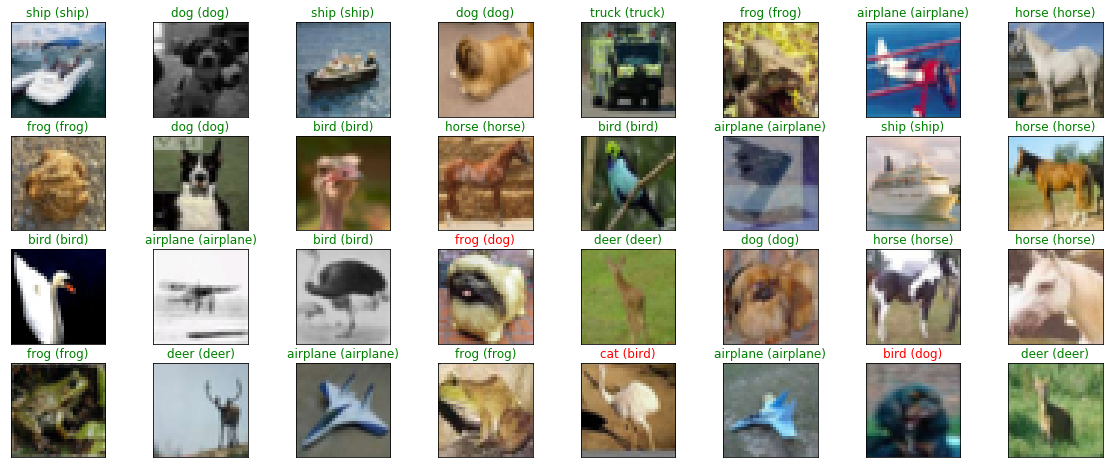

In [78]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test_norm.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test_ori[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx=y_test_ori[idx][0]
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
